In [116]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [28]:
nt_len = 720 #number of time steps
dt = 300.0 #Size of time each time step in seconds
fCor = 0.0001 #strength of the correalis force

u_ana = np.zeros((nt_len)) #an array for the analytical solution
u = np.zeros((nt_len)) #an array for the u of the numerical solution
v = np.zeros((nt_len)) #an array for the v of the numerical solution
time = np.zeros((nt_len)) #an array for the time steps

In [96]:
#Euler forward time loop
KElp = np.zeros((nt_len))

u[0]=10.0 #setting the start position of u for the numerical solution
u_ana[0]=10.0 #setting the start position of u for the analytical solution

for nt in range(1,nt_len): #time loop over the aount of time steps
    time[nt] = time[nt-1]+dt #filling the time array with all consecutive time steps 
    u[nt] = u[nt-1] + (fCor * v[nt-1] * dt) #Euler forward equation for u
    v[nt] = v[nt-1] - (fCor * u[nt-1] * dt) #Euler forward equation for v
    u_ana[nt] = u[0] * m.cos(fCor * time[nt]) #Creating the analytical solution with the built in cosine
    KE[nt] = .5*(v[nt]**2+u[nt]**2)

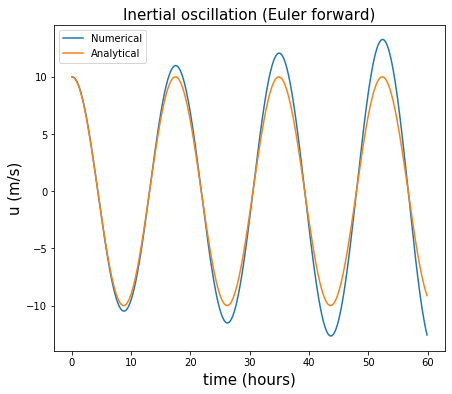

In [94]:
#Euler forward graph
plt.figure(figsize=(7,6))
plt.xlabel('time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Euler forward)',fontsize=15)
plt.plot(time/3600, u,label='Numerical')
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

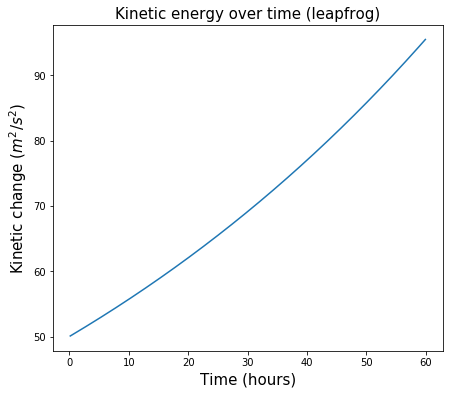

In [97]:
#Euler energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy over time (leapfrog)',fontsize=15)
plt.plot(time[2:720]/3600,(KE[2:720]))
plt.ylabel('Kinetic change ($m^2/s^2$)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [98]:
ulp = np.zeros((nt_len))
vlp = np.zeros((nt_len))
KElp = np.zeros((nt_len))
ulp[0]=10.0

#initialize first step with Euler forward
time[1] = time[0] +dt
ulp[1] = ulp[0] + (fCor *vlp[0]*dt)
vlp[1] = vlp[0] - (fCor *ulp[0]*dt)
for nt in range(1,nt_len-1):
    time[nt+1] = time[nt-1] +dt
    ulp[nt+1] = ulp[nt-1] + (fCor *vlp[nt]*2*dt)
    vlp[nt+1] = vlp[nt-1] - (fCor *ulp[nt]*2*dt)
    KElp[nt+1] = .5*(vlp[nt]**2+ulp[nt]**2)

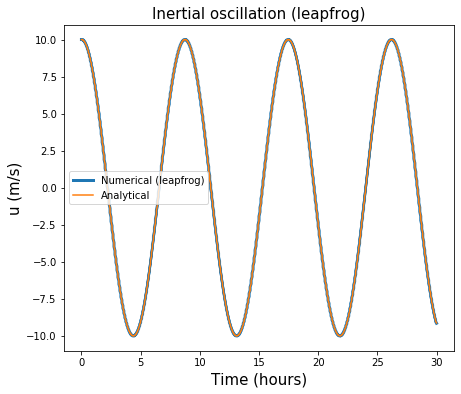

In [99]:
#Leapfrog graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (leapfrog)',fontsize=15)
plt.plot(time/3600, ulp,label='Numerical (leapfrog)', linewidth=3)
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

In [38]:
for i in []

300.0

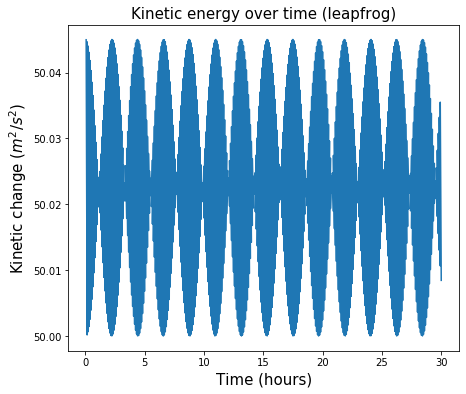

In [100]:
#Leapfrog energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy over time (leapfrog)',fontsize=15)
plt.plot(time[2:720]/3600,(KElp[2:720]))
plt.ylabel('Kinetic change ($m^2/s^2$)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [190]:
timesteps=[10,75,150,300,600]
KElist=[]
for dt in timesteps:
    nt_len=int(60*3600/dt)
    time = np.zeros((nt_len)) #an array for the time steps
    ulp = np.zeros((nt_len))
    vlp = np.zeros((nt_len))
    KElp = np.zeros((nt_len))
    ulp[0]=10.0
    #initialize first step with Euler forward
    time[1] = time[0] +dt
    ulp[1] = ulp[0] + (fCor *vlp[0]*dt)
    vlp[1] = vlp[0] - (fCor *ulp[0]*dt)
    for nt in range(1,nt_len-1):
        time[nt+1] = time[nt-1] +dt
        ulp[nt+1] = ulp[nt-1] + (fCor *vlp[nt]*2*dt)
        vlp[nt+1] = vlp[nt-1] - (fCor *ulp[nt]*2*dt)
        KElp[nt] = .5*(vlp[nt]**2+ulp[nt]**2)    
    KElist.append(np.mean(KElp[nt_len-100:nt_len-1]))

In [191]:
KElist

[50.00002484074871,
 50.00140607901298,
 50.00562954765065,
 50.02234798259096,
 50.089612343228644]

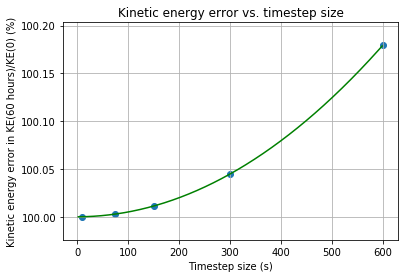

NameError: name 'f' is not defined

In [199]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
import matplotlib.pyplot as plt

xdata=np.array(timesteps)
ydata=np.array(KElist)*2
xlist=np.arange(2,600,1)

def fit(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
popt, pcov = curve_fit(fit,xdata,ydata,p0=[0,0,0,0])

plt.title('Kinetic energy error vs. timestep size')
plt.scatter(xdata,ydata)
plt.plot(xlist,fit(xlist,*popt),'green',label='Gaussian fit of peak')
plt.xlabel('Timestep size (s)')
plt.ylabel('Kinetic energy error in KE(60 hours)/KE(0) (%)')
plt.grid()
plt.show()

#You can get the residual sum of squares (ss_tot) with

residuals = ydata- f(xdata, *popt)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)


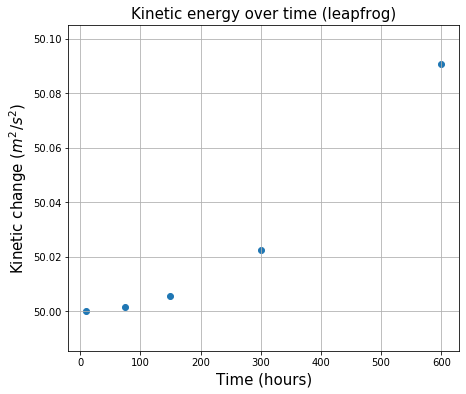

In [171]:
#Error in energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy over time (leapfrog)',fontsize=15)
plt.scatter(timesteps,(KElist))
plt.ylabel('Kinetic change ($m^2/s^2$)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.grid()
plt.show()

In [86]:
#Euler backward time loop
uma = np.zeros((nt_len))
vma = np.zeros((nt_len))
KEma = np.zeros((nt_len-1))

uma[0]=10.0




for nt in range(1,nt_len-1):
    time[nt] = time[nt-1]+dt  
    uma[nt] = uma[nt-1] + (fCor * vma[nt-1] * dt)
    vma[nt] = vma[nt-1] - (fCor * uma[nt-1] * dt)
    u[nt] = uma[nt-1] + (fCor * vma[nt] * dt)
    v[nt] = vma[nt-1] - (fCor * uma[nt] * dt)
    KEma[nt] = .5*(vma[nt]**2+uma[nt]**2)    

SyntaxError: invalid syntax (<ipython-input-85-9992b5c761c6>, line 17)

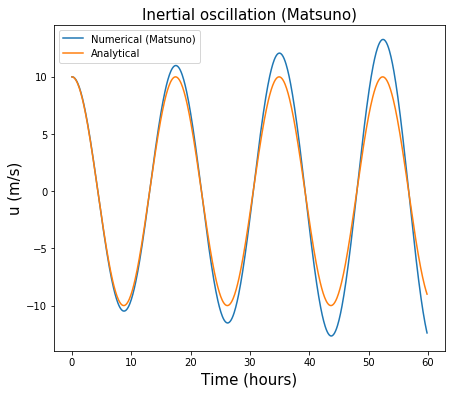

In [292]:
#Euler backward graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Matsuno)',fontsize=15)
plt.plot(time[0:719]/3600, uma[0:719],label='Numerical (Matsuno)')
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

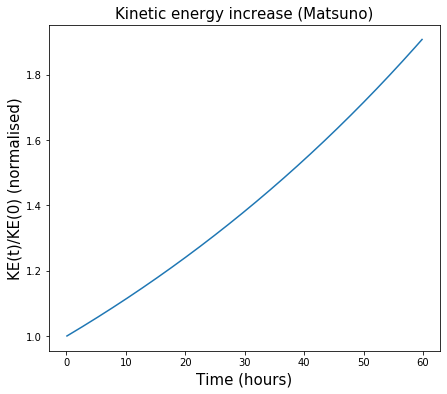

In [307]:
#Matsuno energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Matsuno)',fontsize=15)
plt.plot(time[1:719]/3600,KEma[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [296]:
#Heun's backward time loop
uH = np.zeros((nt_len))
vH = np.zeros((nt_len))
KEH = np.zeros((nt_len-1))

uH[0]=10.0

for nt in range(1,nt_len-1):
    time[nt] = time[nt-1]+dt  
    uH[nt] = uH[nt-1] + (fCor * vH[nt-1] * dt)
    vH[nt] = vH[nt-1] - (fCor * uH[nt-1] * dt)
    uH[nt] = uH[nt-1] + (fCor * (vH[nt]+vH[nt-1]) * dt)/2
    vH[nt] = vH[nt-1] - (fCor * (uH[nt]+uH[nt-1]) * dt)/2
    KEH[nt] = .5*(vH[nt]**2+uH[nt]**2)    

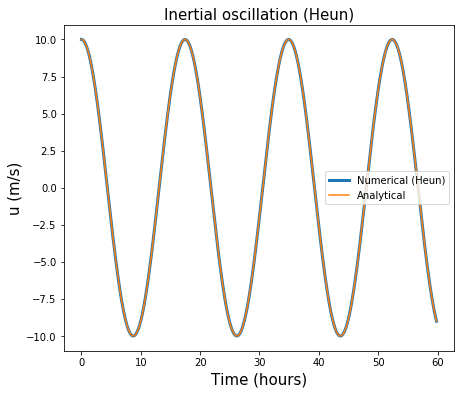

In [305]:
#Heun's graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Heun)',fontsize=15)
plt.plot(time[0:719]/3600, uH[0:719],label='Numerical (Heun)', linewidth=3)
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

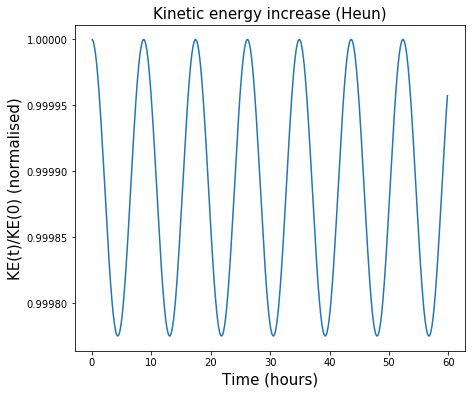

In [310]:
#Leapfrog energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Heun)',fontsize=15)
plt.plot(time[1:719]/3600,KEH[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()